In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier 
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from six import StringIO  
import pydot 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19final-dataset/both_test_unbalanced.csv
/kaggle/input/covid19final-dataset/pcr_unbalanced.csv
/kaggle/input/covid19final-dataset/rapid_balanced.csv
/kaggle/input/covid19final-dataset/both_test_balanced.csv
/kaggle/input/covid19final-dataset/rapid_unbalanced.csv
/kaggle/input/covid19final-dataset/pcr_balanced.csv


# Loading data_rapid!

balanced

In [37]:
data_rapid = pd.read_csv("/kaggle/input/covid19final-dataset/rapid_balanced.csv")
data_rapid=data_rapid.astype(int)

#removing sore throat
data_rapid_rem= data_rapid.copy()
del data_rapid_rem['Symptom- Throat Pain']

unbalanced

In [38]:
data_rapid_unb = pd.read_csv("/kaggle/input/covid19final-dataset/rapid_unbalanced.csv")
data_rapid_unb=data_rapid_unb.astype(int)


#removing sore throat and health professional
data_rapid_unb_rem= data_rapid_unb.copy()
del data_rapid_unb_rem['Symptom- Throat Pain']
del data_rapid_unb_rem['Are you a health professional?']


# Loading data_pcr!

In [39]:
data_pcr= pd.read_csv("/kaggle/input/covid19final-dataset/pcr_balanced.csv")
data_pcr=data_pcr.astype(int)

#removing dyspnea, cough, headache, and coryza
data_pcr_rem=data_pcr.copy()
del data_pcr_rem['Symptom- Dyspnea']
del data_pcr_rem['Symptom- Cough']
del data_pcr_rem['Symptom- Headache']
del data_pcr_rem['Symptom- Coryza']

In [40]:
data_pcr_unb= pd.read_csv("/kaggle/input/covid19final-dataset/pcr_unbalanced.csv")
data_pcr_unb=data_pcr_unb.astype(int)


#removing sore throat, dyspnea, headache, and coryza,
data_pcr_unb_rem=data_pcr_unb.copy()
del data_pcr_unb_rem['Symptom- Dyspnea']
del data_pcr_unb_rem['Symptom- Headache']
del data_pcr_unb_rem['Symptom- Coryza']
del data_pcr_unb_rem['Symptom- Throat Pain']

# Loading both data!

In [41]:
data_both= pd.read_csv("/kaggle/input/covid19final-dataset/both_test_balanced.csv")
data_both=data_both.astype(int)

#removing headache
data_both_rem=data_both.copy()
del data_both_rem['Symptom- Headache']

In [42]:
both_data_unb = pd.read_csv("/kaggle/input/covid19final-dataset/both_test_unbalanced.csv")


#removing sore throat, dyspnea, headache, and coryza
both_data_unb_rem=both_data_unb.copy()

del both_data_unb_rem['Symptom- Headache']


In [43]:
def RandomForest_classif(x_train,y_train,param):
    #Classification
    
    
    clf= RandomForestClassifier(**param)
    clf=clf.fit(x_train, y_train)
    filename = 'randomForest_model.sav'
    pickle.dump(clf, open(filename, 'wb'))
    #filename.to_csv('randomForest_model.sav',index=False)
    return clf

def Kneighbors_classif(x_train,y_train,param):
    #Classification
    

    clf= KNeighborsClassifier(**param)
    clf= clf.fit(x_train, y_train)
    filename = 'kneighbors_model.sav'
    pickle.dump(clf, open(filename, 'wb'))
    #filename.to_csv('kneighbors_model.sav',index=False)
    return clf

def DecisionTree_classif(x_train,y_train,param):
    #Classification
    
    clf = tree.DecisionTreeClassifier(**param)
    clf = clf.fit(x_train,y_train)
    filename = 'decisionTree_model.sav'
    pickle.dump(clf, open(filename, 'wb'))
    #filename.to_csv('decisionTree_model.sav',index=False)
    return clf

def mpl_classif(x_train,y_train,param):
    
    clf =  MLPClassifier(**param)
    clf=clf.fit(x_train,y_train)
    filename = 'mlp_model.sav'
    pickle.dump(clf, open(filename, 'wb'))
    #filename.to_csv('mlp_model.sav',index=False)
    return clf

def gb_classif(x_train,y_train,param):
    
    clf=GradientBoostingClassifier(**param)
    clf=clf.fit(x_train, y_train)
    filename = 'gradientBoosting_model.sav'
    pickle.dump(clf, open(filename, 'wb'))
    #filename.to_csv('gradientBoosting_model.sav',index=False)
    return clf

def xgb_classif(x_train,y_train,param):
    clf = xgb.XGBClassifier(**param)
    filename = 'xgb_model.sav'
    pickle.dump(clf, open(filename, 'wb'))
    #filename.to_csv('xbg_model.sav',index=False)
    return clf.fit(x_train, y_train)

def svc_classif(x_train,y_train,param):
    
    regr = svm.SVC(**param)
    regr=regr.fit(x_train, y_train)
    filename = 'svc_model.sav'
    pickle.dump(regr, open(filename, 'wb'))
    #filename.to_csv('svc_model.sav',index=False)
    return regr

def lg_with_regu_classif(x_train,y_train,param):
    
    clf = LogisticRegression(** param)
    clf=clf.fit(x_train,y_train)
    filename = 'lg_regu_model.sav'
    pickle.dump(clf, open(filename, 'wb'))
    #filename.to_csv('lg_regu_model.sav',index=False)
    return clf

def lg_without_regu_classif(x_train,y_train,param):
    
    clf = LogisticRegression(** param)
    clf=clf.fit(x_train,y_train)
    filename = 'lg_model.sav'  
    pickle.dump(clf, open(filename, 'wb'))
    #filename.to_csv('lg_model.sav',index=False)
    return clf



In [44]:
def calculate_metrics(x_train, x_test,y_train, y_test,data,k,clf,lista,p,r):
        
        
        #prediction
        y_pred=clf.predict(x_test)
    
        #accuracy score
        acc=accuracy_score(y_test,y_pred)*100
        
        #confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
        data.iloc[k:k+1,6:7]=tn
        data.iloc[k:k+1,7:8]=fp
        data.iloc[k:k+1,8:9]=fn
        data.iloc[k:k+1,9:10]=tp
        #ROC CURVE
        mean_fpr = np.linspace(0, 1, 100)
        y_prob=clf.predict_proba(x_test)
        y_prob=y_prob[:, 0]
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_prob,pos_label=0)
        
        interp_tpr = np.interp(mean_fpr,fpr, tpr)
        interp_tpr[0] = 0.0
        lista.append(interp_tpr)
        
        #precision-recall curve
        precision, recall, thresholds = precision_recall_curve( y_test, y_prob)
        p.append(y_test)
        r.append(y_prob)
        #precision
        data.iloc[k:k+1,:1]=(tp/(tp+fp))*100
        
        data.iloc[k:k+1,1:2]=acc
        
        #recall
        data.iloc[k:k+1,2:3]=(tp/(tp+fn))*100
        
        
        #mean absolute error
        data.iloc[k:k+1,3:4]=mean_absolute_error(y_test, y_pred)*100
        
        #AUC
        data.iloc[k:k+1,4:5]= metrics.roc_auc_score(y_test,y_pred)*100
        #Brier score
        data.iloc[k:k+1,5:6]=brier_score_loss(y_test,y_pred)
        
        
        
        return data,lista,p,r
    
def calculate_metrics_voting(x_train, x_test,y_train, y_test,data,k,clf):
        
        
        #prediction
        y_pred=clf.predict(x_test)
        
        #accuracy score
        acc=accuracy_score(y_test,y_pred)*100
        
        #confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
        
        
        
        #precision
        data.iloc[k:k+1,:1]=(tp/(tp+fp))*100
        
        data.iloc[k:k+1,1:2]=acc
        
        #recall
        data.iloc[k:k+1,2:3]=(tp/(tp+fn))*100
        
        
        #mean absolute error
        data.iloc[k:k+1,3:4]=mean_absolute_error(y_test, y_pred)*100
        
        #AUC
        data.iloc[k:k+1,4:5]= metrics.roc_auc_score(y_test,y_pred)*100
        #Brier score
        data.iloc[k:k+1,5:6]=brier_score_loss(y_test,y_pred)
        
        
        
        return data

In [45]:
def k_fold_cross_validation(x,y,lista_param):
    lista1, lista2, lista3, lista4,lista5,lista6,lista7,lista8,lista9 = ([] for i in range(9))
    p1, p2, p3, p4,p5,p6,p7,p8,p9 = ([] for i in range(9))
    r1, r2, r3, r4,r5,r6,r7,r8,r9 = ([] for i in range(9))
    dt=pd.DataFrame(columns=['P','ACC','R','MAE','AUC','BS','tn', 'fp', 'fn', 'tp'],index=range(50))
    rf=pd.DataFrame(columns=['P','ACC','R','MAE','AUC','BS'],index=range(50))
    dmlp=pd.DataFrame(columns=['P','ACC','R','MAE','AUC','BS'],index=range(50))
    dgbm=pd.DataFrame(columns=['P','ACC','R','MAE','AUC','BS'],index=range(50))
    xgboost=pd.DataFrame(columns=['P','ACC','R','MAE','AUC','BS'],index=range(50))
    dt_svm=pd.DataFrame(columns=['P','ACC','R','MAE','AUC','BS'],index=range(50))
    dt_knn=pd.DataFrame(columns=['P','ACC','R','MAE','AUC','BS'],index=range(50))
    dt_lg_regu=pd.DataFrame(columns=['P','ACC','R','MAE','AUC','BS'],index=range(50))
    dt_lg=pd.DataFrame(columns=['P','ACC','R','MAE','AUC','BS'],index=range(50))
                        
    kf=RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
                        
    
    kf.get_n_splits(x,y)
    k=0
    for train_index, test_index in kf.split(x,y):

        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        clf_dt=DecisionTree_classif(x_train,y_train,lista_param[0])
        dt,lista1,p1,r1=calculate_metrics(x_train, x_test,y_train, y_test,dt,k,clf_dt,lista1,p1,r1)
        
        clf_rf=RandomForest_classif(x_train,y_train,lista_param[1])
        rf,lista2,p2,r2=calculate_metrics(x_train, x_test,y_train, y_test,rf,k,clf_rf,lista2,p2,r2)
        
        clf_svm=svc_classif(x_train,y_train,lista_param[2])
        dt_svm,lista3,p3,r3=calculate_metrics(x_train, x_test,y_train, y_test, dt_svm,k,clf_svm,lista3,p3,r3)
       
        clf_knn=Kneighbors_classif(x_train,y_train,lista_param[3])
        dt_knn,lista4,p4,r4=calculate_metrics(x_train, x_test,y_train, y_test, dt_knn,k,clf_knn,lista4,p4,r4)
        
        clf_gbm=gb_classif(x_train,y_train,lista_param[4])
        dgbm,lista5,p5,r5=calculate_metrics(x_train, x_test,y_train, y_test,dgbm,k,clf_gbm,lista5,p5,r5)
        
        clf_lg_regu=lg_with_regu_classif(x_train,y_train,lista_param[5])
        dt_lg_regu,lista6,p6,r6=calculate_metrics(x_train, x_test,y_train, y_test,dt_lg_regu,k,
                                                  clf_lg_regu,lista6,p6,r6)
        
        clf_lg=lg_without_regu_classif(x_train,y_train,lista_param[6])
        dt_lg,lista7,p7,r7=calculate_metrics(x_train, x_test,y_train, y_test,dt_lg,k,clf_lg,lista7,p7,r7)
        
        clf_mlp=mpl_classif(x_train,y_train,lista_param[7])
        dmlp,lista8,p8,r8=calculate_metrics(x_train, x_test,y_train, y_test,dmlp,k,clf_mlp,lista8,p8,r8)
        
        clf_xgboost=xgb_classif(x_train,y_train,lista_param[8])
        xgboost,lista9,p9,r9=calculate_metrics(x_train, x_test,y_train, y_test,xgboost,k,clf_xgboost,lista9,p9,r9)
        print(k)
        k+=1
        data=pd.DataFrame([dt.iloc[:,:6].mean(),rf.iloc[:,:6].mean(),dgbm.iloc[:,:6].mean(),xgboost.iloc[:,:6].mean(),dmlp.iloc[:,:6].mean(),dt_svm.iloc[:,:6].mean(),dt_knn.iloc[:,:6].mean(),dt_lg_regu.iloc[:,:6].mean(),dt_lg.iloc[:,:6].mean()])
        listas=[lista1,lista2,lista3,lista4,lista5,lista6,lista7,lista8,lista9]
        cof_matrix=[dt.iloc[:,6:],rf.iloc[:,6:],dgbm.iloc[:,6:],xgboost.iloc[:,6:],dmlp.iloc[:,6:],dt_svm.iloc[:,6:],dt_knn.iloc[:,6:],dt_lg_regu.iloc[:,6:],dt_lg.iloc[:,6:]]
        p_list=[p1,p2,p3,p4,p5,p6,p7,p8,p9]
        r_list=[r1,r2,r3,r4,r5,r6,r7,r8,r9]
    return  data,listas,cof_matrix,p_list,r_list

In [46]:
def majority_voting(x,y,estimator):
    
    dt=pd.DataFrame(columns=['P','ACC','R','MAE','AUC','BS'],index=range(50))
    
    kf=RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
                        
    
    kf.get_n_splits(x,y)
    k=0
    for train_index, test_index in kf.split(x,y):

        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Voting Classifier with hard voting 
        vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
        vot_hard=vot_hard.fit(x_train, y_train) 
        
        dt= calculate_metrics_voting(x_train, x_test,y_train, y_test, dt,k,vot_hard)
        k+=1
    return dt.mean()

In [47]:
def plot_roc_curve(listas,dt,name):
    f=[np.linspace(0, 1, 100),np.linspace(0, 1, 100),np.linspace(0, 1, 100),np.linspace(0, 1, 100),
       np.linspace(0, 1, 100),np.linspace(0, 1, 100),
       np.linspace(0, 1, 100),np.linspace(0, 1, 100),np.linspace(0, 1, 100)]
    t=[np.mean(listas[0], axis=0),np.mean(listas[1], axis=0),np.mean(listas[2], axis=0),np.mean(listas[3],
        axis=0),np.mean(listas[4], axis=0),np.mean(listas[5], axis=0),np.mean(listas[6], axis=0),np.mean(listas[7], axis=0),np.mean(listas[8], axis=0)]
   
    aucs = [metrics.auc(f[0], t[0]),metrics.auc(f[1], t[1]),metrics.auc(f[2], t[2]),
               metrics.auc(f[3], t[3]),metrics.auc(f[4], t[4]),metrics.auc(f[5], t[5]),
               metrics.auc(f[6], t[6]),metrics.auc(f[7], t[7]),metrics.auc(f[8], t[8])]
    mean_tpr = np.mean(t, axis=0)
    mean_fpr=np.linspace(0, 1, 100)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
   
    
    fig = plt.figure(figsize=(8,6))
    for k in range(9):
        plt.plot(f[k],t[k], 
            label="{}, AUC={:.2f}".format(dt.index[k],float(aucs[k])))

    plt.plot([0,1], [0,1], color='red', linestyle='--',label='Chance')
    plt.plot(mean_fpr, mean_tpr, color='b',linestyle='--',
             label='Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

    std_tpr = np.std(t, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')
    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate(Positive label:0)", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate(Positive label:0)", fontsize=15)

    
    plt.legend(prop={'size':13}, loc='lower right')
    
    plt.savefig(name)
    plt.show()
    
def plot_pr_curve( y_real,y_proba,dt,name):
    fig = plt.figure(figsize=(8,6))
    mean_y_real=[]
    mean_y_prob=[]
    aucs=[]
    for k in range(9):
        real = np.concatenate(y_real[k])
        proba = np.concatenate(y_proba[k])
        mean_y_real.append(real)
        mean_y_prob.append(proba)
        precision, recall, _ = precision_recall_curve(real, proba)
        y_auc=metrics.average_precision_score(real,proba)
        aucs.append(y_auc)
        plt.plot(recall,precision,
        label="{}, AP={:.2f}".format(dt.index[k],y_auc))

    mean_y_real = np.concatenate(mean_y_real)
    mean_y_prob = np.concatenate(mean_y_prob)
    mprecision, mrecall, _ = precision_recall_curve(mean_y_real, mean_y_prob)
    std_auc = np.std(aucs)
    mean_auc=metrics.average_precision_score(mean_y_real,mean_y_prob)
    plt.plot(mrecall,mprecision,color='b',linestyle='--',
        label='Mean PR (AP = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
    
    plt.xlabel('Recall(Positive label:0)',fontsize=15)
    plt.ylabel('Precision(Positive label:0)',fontsize=15)
    plt.legend(loc="lower right")
    plt.savefig(name)
    plt.show()

# Rapid test!

balanced

In [48]:

lista_param=[
             {},
             {},
             {'kernel': 'rbf', 'C': 6,'probability':True},
             {'weights': 'distance', 'n_neighbors': 15,'n_jobs': None, 'leaf_size': 5, 'algorithm': 'ball_tree'},
             {'n_estimators':500,'max_depth':5},
             {'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
             {'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
             {'solver': 'adam', 'random_state': 1, 'max_iter': 1200, 'learning_rate': 'adaptive','alpha': 0.0001, 'activation': 'relu'},
             {'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

d_rapid,listas,cof_matrix,p_list,r_list=k_fold_cross_validation(data_rapid.iloc[:,0:10],data_rapid['Class'],lista_param) 
d_rapid=d_rapid.rename(index={0:'DT',1:'RF',2:'GBM', 3:'XGBoost',4:'Mlp',5:'SVM',6:'KNN',7:'LRR',8:'LRNR'})
d_rapid.astype(float) 



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


,P,ACC,R,MAE,AUC,BS
DT,95.649507,94.583781,93.488462,5.416219,94.583173,0.054162
RF,96.529493,95.308169,94.072115,4.691831,95.306971,0.046918
GBM,96.239259,95.353608,94.471154,4.646392,95.352644,0.046464
XGBoost,96.839270,95.416339,93.949038,4.583661,95.415144,0.045837
Mlp,96.660675,95.400358,94.100962,4.599642,95.398558,0.045996
SVM,97.300178,95.600835,93.853365,4.399165,95.599519,0.043992
KNN,97.430904,94.583065,91.632692,5.416935,94.580769,0.054169
LRR,82.005068,84.228503,87.932212,15.771497,84.229087,0.157715
LRNR,84.756364,85.338581,86.326923,14.661419,85.339423,0.146614


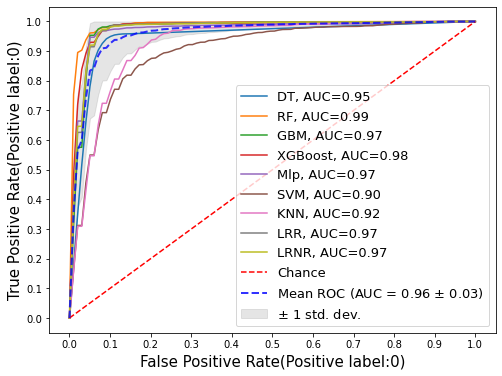

In [50]:
plot_roc_curve(listas,d_rapid,'rapid_balanced_test_roc_curve')

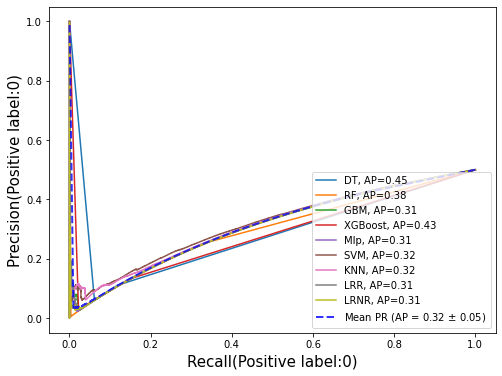

In [51]:
plot_pr_curve( p_list,r_list,d_rapid,'rapid_balanced_test_pr_curve')

removing columns

In [ ]:
'''
d_rapid_rem,listas,c,p,r=k_fold_cross_validation(data_rapid_rem.iloc[:,0:9],data_rapid_rem['Class'],lista_param) 
d_rapid_rem=d_rapid_rem.rename(index={0:'DT',1:'RF',2:'GBM', 3:'XGBoost',4:'Mlp',5:'SVM',6:'KNN',7:'LRR',8:'LRNR'})
d_rapid_rem.astype(float) 
'''

majority voting rapid balanced test

In [ ]:
#GBM, DT, RF, and XGBoost
# group / ensemble of models 
'''
estimator = [] 
estimator.append(('RF',RandomForestClassifier()))
estimator.append(('DT',tree.DecisionTreeClassifier()))
estimator.append(('GBM',GradientBoostingClassifier(n_estimators= 500,max_depth= 5)))
estimator.append(('XGBoost',xgb.XGBClassifier(n_estimators=300,max_depth=9,min_child_weight= 2)))
majority_voting(data_rapid.iloc[:,0:10],data_rapid['Class'],estimator)
'''



In [ ]:
#MLP, SVM, KNN, LRR, and LRNR

# group / ensemble of models 
'''
estimator = [] 
estimator.append(('SVM',svm.SVC(kernel='rbf', C= 6)))
estimator.append(('KNN',KNeighborsClassifier(weights= 'distance',n_neighbors=15,n_jobs= None,leaf_size= 5, algorithm= 'ball_tree')))
estimator.append(('LRR',LogisticRegression(solver= 'liblinear',penalty= 'l2',C= 0.1)))
estimator.append(('LRNR',LogisticRegression(solver= 'liblinear', penalty= 'l2',C=1.0)))
estimator.append(('MLP',MLPClassifier(solver= 'adam',random_state= 1, max_iter= 1200,learning_rate= 'adaptive',alpha= 0.0001,activation='relu')))
majority_voting(data_rapid.iloc[:,0:10],data_rapid['Class'],estimator)

'''

unbalanced

In [52]:

lista_param=[
{},
{},
{'kernel': 'rbf', 'C': 11,'probability':True},
{'weights': 'distance', 'n_neighbors': 5, 'n_jobs': None, 'leaf_size': 3, 'algorithm': 'kd_tree'},
{'n_estimators':500,'max_depth':5},
{'solver': 'saga', 'penalty': 'l2', 'max_iter': 1200, 'C': 0.1},
{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 400, 'C': 4.0},
{'max_iter': 1800,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
{'n_estimators':300,'max_depth':9,'min_child_weight': 2}]            


d_rapid_unb,rlistas,rcof_matrix,rp_list,rr_list=k_fold_cross_validation(data_rapid_unb.iloc[:,0:10],data_rapid_unb['Class'],lista_param) 
d_rapid_unb=d_rapid_unb.rename(index={0:'Decision Tree',1:'Random Forest',2:'GBM', 3:'XGBoost',4:'Mlp',
                         5:'SVM',6:'KNN',7:'LRR',8:'LRNR'})
d_rapid_unb=d_rapid_unb.astype(float) 
d_rapid_unb


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


KeyboardInterrupt: 

In [ ]:
plot_roc_curve(rlistas,d_rapid_unb,'rapid_unbalanced_test_roc_curve')

In [ ]:
plot_pr_curve( rp_list,rr_list,d_rapid_unb,'rapid_unbalanced_test_pr_curve')

removing columns

In [ ]:
'''
d_rapid_unb_rem,listas,c,p,r=k_fold_cross_validation(data_rapid_unb_rem.iloc[:,0:8],data_rapid_unb_rem['Class'],lista_param) 
d_rapid_unb_rem=d_rapid_unb_rem.rename(index={0:'Decision Tree',1:'Random Forest',2:'GBM', 3:'XGBoost',4:'Mlp',
                         5:'SVM',6:'KNN',7:'LRR',8:'LRNR'})
d_rapid_unb_rem.astype(float) 
'''

majoraty voting

In [ ]:
#GBM, DT, RF, and XGBoost
# group / ensemble of models 
'''
estimator = [] 
estimator.append(('RF',RandomForestClassifier()))
estimator.append(('DT',tree.DecisionTreeClassifier()))
estimator.append(('GBM',GradientBoostingClassifier(n_estimators= 500,max_depth= 5)))
estimator.append(('XGBoost',xgb.XGBClassifier(n_estimators=300,max_depth=9,min_child_weight= 2)))
majority_voting(data_rapid_unb.iloc[:,0:10],data_rapid_unb['Class'],estimator)
'''

In [ ]:
#MLP, SVM, KNN, LRR, and LRNR

# group / ensemble of models 
'''
estimator = [] 
estimator.append(('SVM',svm.SVC(kernel='rbf', C= 11)))
estimator.append(('KNN',KNeighborsClassifier(weights= 'distance',n_neighbors=5,n_jobs= None,leaf_size= 3, algorithm= 'ball_tree')))
estimator.append(('LRR',LogisticRegression(solver ='saga',penalty ='l2',max_iter =1200,C= 0.1)))
estimator.append(('LRNR',LogisticRegression(solver= 'lbfgs',penalty= 'l2',max_iter= 400,C=4.0)))
estimator.append(('MLP',MLPClassifier(max_iter= 1800,solver='lbfgs',alpha=1e-5,random_state=42)))
majority_voting(data_rapid_unb.iloc[:,0:10],data_rapid_unb['Class'],estimator)
'''

# Test pcr prediction!

balanced

In [ ]:
lista_param=[
{},
{},
{'kernel': 'rbf', 'C': 7,'probability':True},
{'weights': 'distance', 'n_neighbors': 5, 'n_jobs': None, 'leaf_size': 3, 'algorithm': 'kd_tree'},
{'n_estimators':500,'max_depth':5},
{'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
{'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
{'max_iter': 1800,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
{'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

d_pcr,listas,cof_matrix,p_list,r_list=k_fold_cross_validation(data_pcr.iloc[:,0:10],data_pcr['Class'],lista_param)  
d_pcr=d_pcr.rename(index={0:'Decision Tree',1:'Random Forest',2:'GBM', 3:'XGBoost',4:'Mlp',
                         5:'SVM',6:'KNN',7:'LRR',8:'LRNR'})
d_pcr=d_pcr.astype(float) 
d_pcr


In [ ]:
plot_roc_curve(listas,d_pcr,'pcr_balanced_test_roc_curve')

In [ ]:
plot_pr_curve(p_list,r_list,d_pcr,'pcr_balanced_test_pr_curve')

removing columns

In [ ]:
'''
d_pcr_rem,listas,c,p,r=k_fold_cross_validation(data_pcr_rem.iloc[:,0:6],data_pcr_rem['Class'],lista_param)  
d_pcr_rem=d_pcr_rem.rename(index={0:'Decision Tree',1:'Random Forest',2:'GBM', 3:'XGBoost',4:'Mlp',
                         5:'SVM',6:'KNN',7:'LRR',8:'LRNR'})
d_pcr_rem.astype(float) 
'''

majority voting

In [ ]:
#GBM, DT, RF, and XGBoost
# group / ensemble of models 
'''
estimator = [] 
estimator.append(('RF',RandomForestClassifier()))
estimator.append(('DT',tree.DecisionTreeClassifier()))
estimator.append(('GBM',GradientBoostingClassifier(n_estimators= 500,max_depth= 5)))
estimator.append(('XGBoost',xgb.XGBClassifier(n_estimators=300,max_depth=9,min_child_weight= 2)))
majority_voting(data_pcr.iloc[:,0:10],data_pcr['Class'],estimator)
'''

In [ ]:
#MLP, SVM, KNN, LRR, and LRNR

# group / ensemble of models 
'''
estimator = [] 
estimator.append(('SVM',svm.SVC(kernel='rbf', C= 7)))
estimator.append(('KNN',KNeighborsClassifier(weights= 'distance',n_neighbors=5,n_jobs= None,leaf_size= 3, algorithm= 'kd_tree')))
estimator.append(('LRR',LogisticRegression(solver= 'liblinear',penalty= 'l2',C= 0.1)))
estimator.append(('LRNR',LogisticRegression(solver='liblinear',penalty= 'l2',C=1.0)))
estimator.append(('MLP',MLPClassifier(max_iter= 1800,solver='lbfgs',alpha=1e-5,random_state=42)))
majority_voting(data_pcr.iloc[:,0:10],data_pcr['Class'],estimator)
'''

unbalanced

In [ ]:
lista_param=[
{},
{},
{'kernel': 'rbf', 'C': 6,'probability':True},
{'weights': 'distance', 'n_neighbors': 8, 'n_jobs': -1, 'leaf_size': 2, 'algorithm': 'auto'},
{'n_estimators':500,'max_depth':5},
{'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
{'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
{'max_iter': 1800,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
{'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

d_pcr_unb,punblistas,punbcof_matrix,punbp_list,punbr_list=k_fold_cross_validation(data_pcr_unb.iloc[:,0:10],data_pcr_unb['Class'],lista_param)  
d_pcr_unb=d_pcr_unb.rename(index={0:'Decision Tree',1:'Random Forest',2:'GBM', 3:'XGBoost',4:'Mlp',
                         5:'SVM',6:'KNN',7:'LRR',8:'LRNR'})
d_pcr_unb=d_pcr_unb.astype(float) 
d_pcr_unb


In [ ]:
plot_roc_curve(punblistas,d_pcr_unb,'pcr_unbalanced_test_roc_curve')

In [ ]:
plot_pr_curve(punbp_list,punbr_list,d_pcr_unb,'pcr_unbalanced_test_pr_curve')

removing columns

In [ ]:
'''
d_pcr_unb_rem,listas,c,p,r=k_fold_cross_validation(data_pcr_unb_rem.iloc[:,0:6],data_pcr_unb_rem['Class'],lista_param)  
d_pcr_unb_rem=d_pcr_unb_rem.rename(index={0:'Decision Tree',1:'Random Forest',2:'GBM', 3:'XGBoost',4:'Mlp',
                         5:'SVM',6:'KNN',7:'LRR',8:'LRNR'})
d_pcr_unb_rem.astype(float) 
'''

majority voting

In [ ]:
#GBM, DT, RF, and XGBoost
# group / ensemble of models 
'''
estimator = [] 
estimator.append(('RF',RandomForestClassifier()))
estimator.append(('DT',tree.DecisionTreeClassifier()))
estimator.append(('GBM',GradientBoostingClassifier(n_estimators= 500,max_depth= 5)))
estimator.append(('XGBoost',xgb.XGBClassifier(n_estimators=300,max_depth=9,min_child_weight= 2)))
majority_voting(data_pcr_unb.iloc[:,0:10],data_pcr_unb['Class'],estimator)
'''

In [ ]:
#MLP, SVM, KNN, LRR, and LRNR

# group / ensemble of models 
'''
estimator = [] 
estimator.append(('SVM',svm.SVC(kernel='rbf', C= 6)))
estimator.append(('KNN',KNeighborsClassifier(weights='distance',n_neighbors= 8,n_jobs= -1,leaf_size= 2,algorithm= 'auto')))
estimator.append(('LRR',LogisticRegression(solver= 'liblinear',penalty= 'l2',C= 0.1)))
estimator.append(('LRNR',LogisticRegression(solver= 'liblinear',penalty= 'l2',C=1.0)))
estimator.append(('MLP',MLPClassifier(max_iter=1800,solver='lbfgs',alpha=1e-5,random_state=42)))
majority_voting(data_pcr_unb.iloc[:,0:10],data_pcr_unb['Class'],estimator)
'''

# Both test prediction!

balanced

In [ ]:
lista_param=[{},{},{'kernel': 'rbf', 'C': 9,'probability':True},
             {'weights': 'distance','n_neighbors': 8, 'n_jobs': -1,'leaf_size': 5, 'algorithm': 'brute'},
             {'n_estimators':500,'max_depth':5},
             {'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
             {'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
             {'max_iter': 1200,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
             {'n_estimators':300,'max_depth':9,'min_child_weight': 2}]



d,dlistas,dcof_matrix,dp_list,dr_list=k_fold_cross_validation(data_both.iloc[:,0:10],data_both['Class'],lista_param)
  
d=d.rename(index={0:'Decision Tree',1:'Random Forest',2:'GBM', 3:'XGBoost',4:'Mlp',
                         5:'SVM',6:'KNN',7:'LRR',8:'LRNR'})
d=d.astype(float) 
d


In [ ]:
plot_roc_curve(dlistas,d,'both_balanced_tests_roc_curve')

In [ ]:
plot_pr_curve(dp_list,dr_list,d,'both_balanced_test_pr_curve')

removing columns

In [ ]:
'''
d_rem,listas,c,p,r=k_fold_cross_validation(data_both_rem.iloc[:,0:9],data_both_rem['Class'],lista_param)
  
d_rem=d_rem.rename(index={0:'Decision Tree',1:'Random Forest',2:'GBM', 3:'XGBoost',4:'Mlp',
                         5:'SVM',6:'KNN',7:'LRR',8:'LRNR'})
d_rem.astype(float) 
'''

majority voting

In [ ]:
#GBM, DT, RF, and XGBoost
# group / ensemble of models 
'''
estimator = [] 
estimator.append(('RF',RandomForestClassifier()))
estimator.append(('DT',tree.DecisionTreeClassifier()))
estimator.append(('GBM',GradientBoostingClassifier(n_estimators= 500,max_depth= 5)))
estimator.append(('XGBoost',xgb.XGBClassifier(n_estimators=300,max_depth=9,min_child_weight= 2)))
majority_voting(data_both.iloc[:,0:10],data_both['Class'],estimator)
'''

In [ ]:
#MLP, SVM, KNN, LRR, and LRNR

# group / ensemble of models 
'''
estimator = [] 
estimator.append(('SVM',svm.SVC(kernel='rbf', C= 9)))
estimator.append(('KNN',KNeighborsClassifier(weights= 'distance',n_neighbors=8,n_jobs= -1,leaf_size= 5,algorithm= 'brute')))
estimator.append(('LRR',LogisticRegression(solver= 'liblinear',penalty= 'l2',C= 0.1)))
estimator.append(('LRNR',LogisticRegression(solver= 'liblinear',penalty= 'l2',C=1.0)))
estimator.append(('MLP',MLPClassifier(max_iter=1200,solver='lbfgs',alpha=1e-5,random_state=42)))
majority_voting(data_both.iloc[:,0:10],data_both['Class'],estimator)
'''

unbalanced

In [ ]:
lista_param=[{},{},{'kernel': 'rbf', 'C': 8,'probability':True},
             {'n_neighbors': 15},
             {'n_estimators':500,'max_depth':5},
             {'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
             {'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
             {'max_iter': 1800,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
            {'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

d2,d2listas,d2cof_matrix,d2p_list,d2r_list=k_fold_cross_validation(both_data_unb.iloc[:,0:10],both_data_unb['Class'],lista_param)
  
d2=d2.rename(index={0:'Decision Tree',1:'Random Forest',2:'GBM', 3:'XGBoost',4:'Mlp',
                         5:'SVM',6:'KNN',7:'LRR',8:'LRNR'})
d2=d2.astype(float) 
d2


In [ ]:
plot_roc_curve(d2listas,d2,'both_unbalanced_tests_roc_curve')

In [ ]:
plot_pr_curve(d2p_list,d2r_list,d2,'both_unbalanced_test_pr_curve')

removing columns

In [54]:

d2_rem,listas,c,p,r=k_fold_cross_validation(both_data_unb_rem.iloc[:,0:9],both_data_unb_rem['Class'],lista_param)
  
d2_rem=d2_rem.rename(index={0:'Decision Tree',1:'Random Forest',2:'GBM', 3:'XGBoost',4:'Mlp',
                         5:'SVM',6:'KNN',7:'LRR',8:'LRNR'})
d2_rem.astype(float)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


KeyboardInterrupt: 

majority voting

In [ ]:
#GBM, DT, RF, and XGBoost
# group / ensemble of models 
'''
estimator = [] 
estimator.append(('RF',RandomForestClassifier()))
estimator.append(('DT',tree.DecisionTreeClassifier()))
estimator.append(('GBM',GradientBoostingClassifier(n_estimators= 500,max_depth= 5)))
estimator.append(('XGBoost',xgb.XGBClassifier(n_estimators=300,max_depth=9,min_child_weight= 2)))
majority_voting(both_data_unb.iloc[:,0:10],both_data_unb['Class'],estimator)
'''

In [ ]:
#MLP, SVM, KNN, LRR, and LRNR

# group / ensemble of models 
'''
estimator = [] 
estimator.append(('SVM',svm.SVC(kernel='rbf', C= 8)))
estimator.append(('KNN',KNeighborsClassifier(n_neighbors=15)))
estimator.append(('LRR',LogisticRegression(solver= 'liblinear',penalty= 'l2',C= 0.1)))
estimator.append(('LRNR',LogisticRegression(solver= 'liblinear',penalty= 'l2',C=1.0)))
estimator.append(('MLP',MLPClassifier(max_iter=1800,solver='lbfgs',alpha=1e-5,random_state=42)))
majority_voting(both_data_unb.iloc[:,0:10],both_data_unb['Class'],estimator)
'''